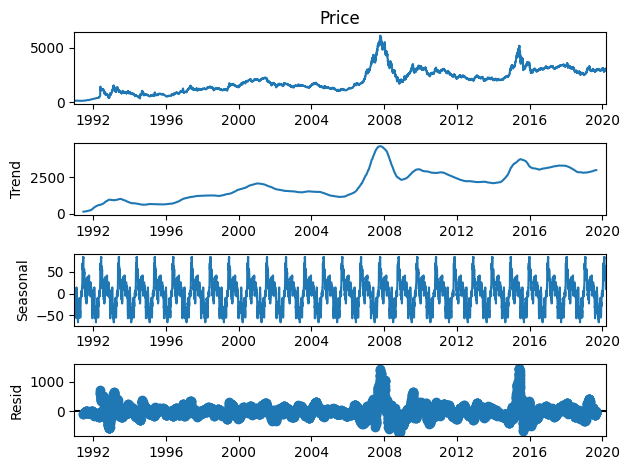

In [5]:
# 使用tsa对沪市指数进行分析：trend, seasonal, residual
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# 数据加载
data = pd.read_csv('shanghai_index_1990_12_19_to_2020_03_12.csv', usecols=['Timestamp', 'Price'])
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')
data['Price'] = data['Price'].apply(pd.to_numeric)
# 进行线性插补缺漏值
# data.Price.interpolate(inplace=True)
data['Price'] = data['Price'].interpolate()
#  返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
result = sm.tsa.seasonal_decompose(data.Price, period=250)
result.plot()
plt.show()

In [ ]:
#help(sm.tsa.seasonal_decompose)

# 检查索引频率
freq = pd.infer_freq(data.index)
print(f"数据的时间频率为: {freq}")

# 计算每年平均样本数（更稳健地得到“年周期”近似）
yearly_counts = data['Price'].resample('YE').count()
approx_trading_days = int(round(yearly_counts.mean()))
print(f"每年平均交易日数: {approx_trading_days}")

# 用该值作为 period （或直接用常见的 250/252）
period = approx_trading_days

period

数据的时间频率为: None
每年平均交易日数: 230


230